## 분류 문제
지도 학습 데이터(정답이 있는 데이터)에 따라 학습하여 미지의 데이터를 분류하는 문제
- 예) 색상과 크기로 과일 분류
![](./img/6.png)

- 예)미지의 데이터 분류하기
![/img/7.png](./img/7.png)

## 손글자 분류 하기
### digit 데이터셋
digit 데이터셋은 0부터 9까지 손으로 쓴 숫자 이미지로 구성, 8x8 픽셀 흑백 이미지의 1797장이 들어 있음

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

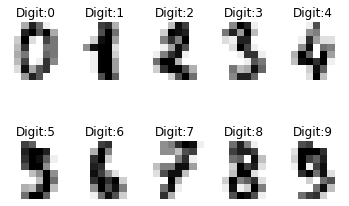

In [2]:
digits = datasets.load_digits()

for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2,5,label+1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit:%d' % label)
    

### 분류기를 만들어 평가

scikit-learn을 사용해 3과8 이미지 데이터를 분류하는 분류기를 작성

In [4]:
import numpy as np
from sklearn import datasets

#### 데이터 생성

In [26]:
digits = datasets.load_digits()
flag_3_8 = (digits.target==3)+(digits.target==8)

images = digits.images[flag_3_8]
labels = digits.target[flag_3_8]

images = images.reshape(images.shape[0],-1)

#### 모델 생성 및 학습

In [35]:
from sklearn import tree

In [36]:
n_samples = len(flag_3_8[flag_3_8])
train_size = int(n_samples * 3 / 5)
classifier = tree.DecisionTreeClassifier()
classifier.fit(images[:train_size], labels[:train_size])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### 성능 평가

In [37]:
from sklearn import metrics

expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])
print('Accuracy : ', metrics.accuracy_score(expected, predicted))

Accuracy :  0.8811188811188811


### 분류기 성능 평가
#### 분류기의 성능 지표
2분류 중 Positive와 Negative중 하나를 반환하는 분류기가 있고 각자 분류된 결과의 정답과 오답이 있다고 하면 다음과 같은 혼동행렬(confusion matrix)이 만들어진다. 
![./5.png](./img/5.png)
행령에서 예측 결과가 맞다면 True, 틀리면 False라고 생각하자. True Positive는 Positive라는 예측이 정답인 상태이고, False Positive라면 Positive라는 예측이 오답이라는 의미이다.

다음 4가지는 분류기의 성능지표로 활용된다.
![./img/8.png](./img/8.png)

- 정답률 : 전체 예측 안에서 정답이 있는 비율
- 적합률 : Positive로 예측했을 때 예측이 맞아 진짜로 Positive인 비율
- 재현률 : 실제로 Positive인 것을 분류기가 얼마나 Positive라고 예측하였는지 나타내는 비율(실제로 Positive인 것 중에 어느 정도로 검출할 수 있는지 가늠)
    - 적합률과 재현률은 Negative 레이블 기준으로도 정의 가능
- F값 : 적합률과 재현률의 조화평균을 내어 계산한 지표 
![./img/9.png](./img/9.png)

#### 평가 성능 알아보기

In [8]:
print('Accuracy : ', metrics.accuracy_score(expected, predicted))

print('Confusion matrix :\n', metrics.confusion_matrix(expected, predicted))

print('Precision : ', metrics.precision_score(expected, predicted, pos_label=3))

print('Recall : ', metrics.recall_score(expected, predicted, pos_label=3))

print('F-measure : ', metrics.f1_score(expected, predicted, pos_label=3))

print("*"*50)

print('Precision : ', metrics.precision_score(expected, predicted, pos_label=8))

print('Recall : ', metrics.recall_score(expected, predicted, pos_label=8))

print('F-measure : ', metrics.f1_score(expected, predicted, pos_label=8))

Accuracy :  0.8531468531468531
Confusion matrix :
 [[59 16]
 [ 5 63]]
Precision :  0.921875
Recall :  0.7866666666666666
F-measure :  0.8489208633093526
**************************************************
Precision :  0.7974683544303798
Recall :  0.9264705882352942
F-measure :  0.8571428571428572


#### 성능 지표 해석



어떤 공장에서 제품의 결함을 찾는 분류기가 있다 성능지표가 아래와 같을 때 해석해보면,
- 정답률 : 98.6%
- 정상
    - 적합률 : 99.1% 
    - 재현률 : 99.5%
- 결함
    - 적합률 : 81.2%
    - 재현률 : 68.6%



- 제품을 정상으로 예측하였을 때 실제로 정상인 경우(정상 적합률) : 99.1%
- 제품을 정상으로 예측하였으나 실제는 결함인 경우 : 0.9%
- 제품이 실제로 정상이고 예측을 정상으로 한 경우(정상 재현율) : 99.5%
- 제품이 실제로 정상이지만 예측을 결함으로 한 경우 : 0.5%



- 제품을 결함으로 예측하였을 때 실제로 결함인 경우(결함 적합률) : 81.2%
- 제품을 결함으로 예측하였으나 실제로는 정상인 경우 : 17.8%
- 제품이 실제로 결함이고 예측을 결함으로 한 경우(결함 재현률) : 68.6%
- 제품이 실제로 결함이지만 예측을 정상으로 한 경우 : 31.4%



- 정상일 경우는 훌륭하지만 결함을 보면 결함으로 예측한 제품이 실제로는 정상이었던 오류가 17.8%가 발생하고, 결함제품이지만 정상으로 예측하여 결함된 제품이 출하되는 경우가 31.4%나 된다.

적합률과 재현률은 의미가 다르므로 문제에 따라 어느 것을 중시해야 될지 선택해야 함, 레이블의 종합적인 분류 성능을 파악하고 싶다면 F값을 사용한다(높을 수록 좋다).

### 여러가지 분류기
#### 결정트리 (Decision Tree)
결정 트리는 데이터를 여러 등급으로 분류하는 지도학습으로 트리 구조를 이용한 분류 알고리즘이다. 분류 대상의 데이터의 속성에 따라 분류한다.
![./img/11.png](./img/11.png)
![./img/23.png](./img/23.png)

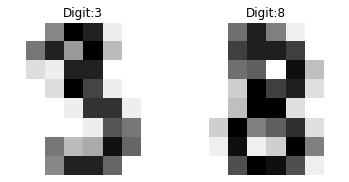

In [39]:
digits = datasets.load_digits()
t = 1
for label, img in zip(digits.target[:10], digits.images[:10]):
    if label == 3 or label == 8:
        plt.subplot(1,2,t)
        t +=1
        plt.axis('off')
        plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Digit:%d' % label)

#### 랜덤 포레스트 (Random Forest)
전체 학습 데이터 중에서 중복이나 누락을 허용하여 학습 데이터셋을 여러개 추출한다.
![./img/12.png](./img/12.png)
그 일부 속성을 사용해 부분적인 결정 트리를 생성한다. 결정 트리를 조합해 성능이 높은 모델을 만든다.
![./img/13.png](./img/13.png)
##### 분류기 생성

In [41]:
from sklearn import ensemble
classifier = ensemble.RandomForestClassifier(n_estimators=20,
                                             max_depth=3,
                                             criterion='gini')
classifier.fit(images[:train_size], labels[:train_size])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

##### 분류기 성능 평가

In [42]:
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('Accuracy:\n',
      metrics.accuracy_score(expected, predicted))
print('Confusion matrix:\n',
      metrics.confusion_matrix(expected, predicted))
print('Precision:\n',
      metrics.precision_score(expected, predicted, pos_label=3))
print('Recall:\n',
      metrics.recall_score(expected, predicted, pos_label=3))
print('F-measure:\n',
      metrics.f1_score(expected, predicted, pos_label=3))

print("*"*50)

print('Precision:\n',
      metrics.precision_score(expected, predicted, pos_label=8))
print('Recall:\n',
      metrics.recall_score(expected, predicted, pos_label=8))
print('F-measure:\n',
      metrics.f1_score(expected, predicted, pos_label=8))

Accuracy:
 0.8811188811188811
Confusion matrix:
 [[61 14]
 [ 3 65]]
Precision:
 0.953125
Recall:
 0.8133333333333334
F-measure:
 0.8776978417266187
**************************************************
Precision:
 0.8227848101265823
Recall:
 0.9558823529411765
F-measure:
 0.8843537414965986


## 회귀 문제
### 최소제곱법의 아이디어
데이터를 평면상의 점으로 생각하고 관계를 선으로 표현할 때 어느 선이 가장 데이터를 잘 나타내는 것은 어떤 것인가?
![./img/14.png](./img/14.png)

<br>
<br>
<br>
<br>
실제값(y)과 예측값(f(x)) 차이에 대한 제곱의 곱을 구성하고 이 값을 최소화
![./img/15.png](./img/15.png)
### 선형 회귀
변수는 어떤 데이터셋에서 속성값 하나를 의미하고, 변수 하나(y = aX + b)로 성립할 수 있는 단순 회귀를 알아보자
y = 3x - 2로 데이터를 작성하자.

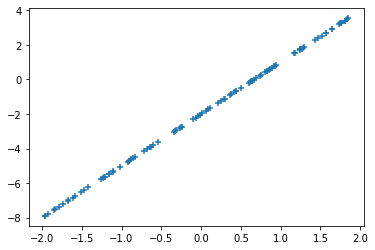

In [43]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100, 1)
x = x * 4 - 2
y = 3 * x - 2
plt.scatter(x,y,marker='+')

sciket-learn에서 최소제곱법을 구현한 LinearRegression 을 활용하여 계산해보자

In [44]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

직선의 함수식 y = aX + b에서 a계수는 model.coef_를 확인하고 절편 b는 model.intercept)로 확인한다.

In [45]:
print(model.coef_)
print(model.intercept_)

[[3.]]
[-2.]


결과로 y = 3X - 2가 된다. 다음은 난수로 오차를 준 경우이다.

[[3.07094382]]
[-1.92047854]


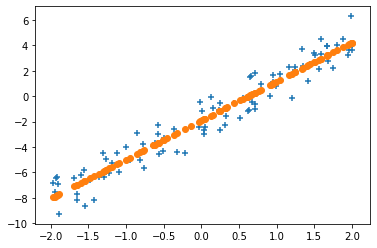

In [46]:
x = np.random.rand(100,1)
x = x * 4 - 2
y = 3 * x - 2

y += np.random.randn(100, 1)

model = linear_model.LinearRegression()
model.fit(x,y)

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x), marker='o')

print(model.coef_)
print(model.intercept_)

### 회귀의 평가 : 결정 계수
회귀에서 결과의 타당성을 객관적으로 평가하는 지표로 R<sup>2</sup> 결정 계수가 있다.
![./img/16.png](./img/16.png)
관측값과 예측값의 차이가 적으면 결정 계수는 1에 가까워지며, 차이가 크면 멀어진다.
따라서 결정 계수 값이 1에 가까워 질 수록 좋은 모델이라 할 수 있다. sklearn.linear_model의 각 클래스에는 score 함수를 활용하여 결정 계수를 구할 수 있다.

In [47]:
print(model.score(x,y))

0.9352146150382689


### y = aX<sup>2</sup> + b 를 구한다

계수 [[3.02288969]]
절편 [-1.92454171]
결정계수 0.9380280536948059


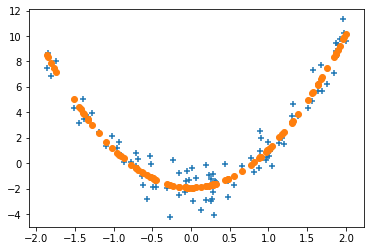

In [48]:
import matplotlib.pyplot as plt
import numpy as np


### 분산 y = 3x -2 데이터를 생성

x = np.random.rand(100, 1)  # 0~1까지 난수를 100개 만든다
x = x * 4 - 2               # 값의 범위를 -2~2로 변경

y = 3 * x**2 - 2  # y = 3x^2 - 2

y += np.random.randn(100, 1)  # 표준 정규 분포(평균 0, 표준 편차 1)의 난수를 추가함


### 학습

from sklearn import linear_model


model = linear_model.LinearRegression()
model.fit(x**2, y)  # x를 제곱해 전달


### 계수, 절편, 결정 계수를 표시

print('계수', model.coef_)
print('절편', model.intercept_)

print('결정계수', model.score(x**2, y))


### 그래프 표시

plt.scatter(x, y, marker ='+')
plt.scatter(x, model.predict(x**2), marker='o')  # predict에도 x를 제곱해 전달
plt.show()

### 다중 회귀
다중 회귀는 변수(데이터 셋에서 여러 칼럼)를 여러개 사용하는 식(y = aX<sub>1</sub> + bX<sub>2</sub> + d)를 상정해 푸는 회귀문제이다. 다음과 같이 데이터를 구하자

Text(0, 0.5, 'y')

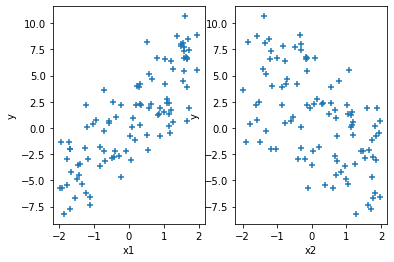

In [49]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.random.rand( 100, 1 )   # 0~1까지 난수를 100개 만들
x1 = x1 * 4 - 2                 # 값의 범위를 -2~2로 변경

x2 = np.random.rand( 100, 1 )   # x2에 대해서도 마찬가지
x2 = x2 * 4 - 2

y = 3 * x1 - 2 * x2 + 1

y += np.random.randn( 100, 1 )    # 표준 정규 분포(평균0, 표준 편차1)
                                 # 난수를 더한다
plt.subplot( 1, 2, 1 )
plt.scatter( x1, y, marker='+' )
plt.xlabel( 'x1' )
plt.ylabel( 'y' )

plt.subplot( 1, 2, 2 )
plt.scatter( x2, y, marker='+' )
plt.xlabel( 'x2' )
plt.ylabel( 'y' )

계수 [[ 2.98895385 -2.11507816]]
절편 [1.0050169]
결정계수 0.9529086052490223


Text(0, 0.5, 'y')

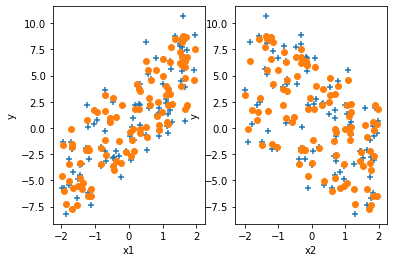

In [50]:
from sklearn import linear_model


x1_x2 = np.c_[x1, x2]  # [[x1_1, x2_1], [x1_2, x2_2], ..., [x1_100, x2_100]]
                       # 형태로 변환

model = linear_model.LinearRegression()
model.fit(x1_x2, y)


### 계수, 절편, 결정 계수를 표시

print('계수', model.coef_)
print('절편', model.intercept_)
print('결정계수', model.score(x1_x2, y))

### 그래프 표시

y_ = model.predict(x1_x2)  # 구한 회귀식으로 예측

plt.subplot(1, 2, 1)
plt.scatter(x1, y, marker='+')
plt.scatter(x1, y_, marker='o')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(x2, y, marker='+')
plt.scatter(x2, y_, marker='o')
plt.xlabel('x2')
plt.ylabel('y')

계수와 절편을 통해 다음과 같은 다항식을 만들 수 있다.

In [51]:
print("y = %sX1 %sX2 + %s" % (model.coef_[0][0], model.coef_[0][1], model.intercept_))

y = 2.9889538476209485X1 -2.1150781598343014X2 + [1.0050169]


## 클러스터링 문제

클러스터링은 데이터의 성질에서 데이터 군집(클러스터)를 만드는 방법이다.
2차원의 데이터를 산포도로 그리면 대략적인 배치와 구조를 알 수 있지만 다차원이고 대량이면 파악하기가 어렵다. 이를 위해 클러스터링을 활용하여 분류한다.

### k-means 클러스터링

k-means 클러스터링은 클러스터 개수(k)를 미리 지정하고 데이터간의 거리를 통해 클러스터를 구성하는 방법이다.
다음 순서로 진행된다.

1. 클러스터의 갯수(그림에서는 5개의 빨간점)만큼 임의의 중심값(기준값)을 선택한다.
![./img/17.png](./img/17.png)
2. 각 데이터에서 중심값의 거리를 구한다. 데이터는 거리가 가장 짧은 중심점에 속한 클러스터로 소속된다.
![./img/18.png](./img/18.png)
3. 클러스터에 소속된 데이터끼리 중심점을 재계산한다.
![./img/19.png](./img/19.png)
4. 데이터들의 클러스터가 바뀌지 않을 때까지 2, 3을 반복한다.
![./img/20.png](./img/20.png)

최종 결과
![./img/21.png](./img/21.png)

### k-means 실행
iris 데이터를 로드해 k-means에서 클러스터를 만들어 보자.

In [52]:
from sklearn import cluster
from sklearn import datasets

# iris 데이터를 로드
iris = datasets.load_iris()
data = iris["data"]

# 학습 → 클러스터 생성
model = cluster.KMeans(n_clusters=3)
model.fit(data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 클러스터링 결과


- cluster_centers_ : 클러스터의 중심좌표
- labels_ : 각 점에 대한 레이블
- inertia_ : 각 데이터 점에서 소속된 클러스터 중심까지 거리 총합
    

In [53]:
print(model.cluster_centers_)
print(model.labels_)
print(model.inertia_)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
78.94084142614602


### 결과의 가시화

In [22]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Text(0.5, 1.0, 'k-means')

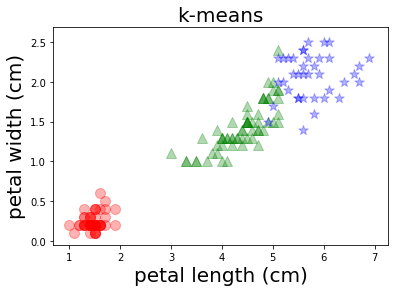

In [27]:
x_index = 2
y_index = 3

data_x=data[:,x_index]
data_y=data[:,y_index]

x_label = iris["feature_names"][x_index]
y_label = iris["feature_names"][y_index]

# 학습 결과의 라벨 취득
labels = model.labels_

# 삼포도 그리기
plt.scatter(data_x[labels==0], data_y[labels==0],c='r' ,alpha=0.3, s=100, marker="o")
plt.scatter(data_x[labels==1], data_y[labels==1],c='g' ,alpha=0.3, s=100, marker="^")
plt.scatter(data_x[labels==2], data_y[labels==2],c='b' ,alpha=0.3, s=100, marker="*")

# 축 라벨과 타이틀 설정
plt.xlabel(x_label,fontsize='20')
plt.ylabel(y_label,fontsize='20')
plt.title("k-means",fontsize='20')


### 혼동행렬을 통한 클러스터 분석

In [24]:
from sklearn import metrics
print(metrics.confusion_matrix(iris['target'], model.labels_))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


In [25]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

![22.png](./img/22.png)